In [55]:
#In this notebook i try to visualize a high dimensional mixture of text with tsne
#this is a utility class i use at the beginning of all data sets
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcelikkaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcelikkaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
#!pip install gensim
#!pip install wikipedia

In [9]:
import wikipedia
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.corpora import Dictionary

import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

def download_from_wiki(keywords):
  splits = keywords.split(",")
  sentences = []
  for split in splits:
    try:
      sentences.append(wikipedia.summary( split ))
    except:
      print("error ",split) 
  return sentences

In [10]:
japan_prefectures = "Hokkaidō,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tōkyō,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyōto,Ōsaka,Hyōgo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kōchi,Fukuoka,Saga,Nagasaki,Kumamoto,Ōita,Miyazaki,Kagoshima,Okinawa"

japan_sentences = download_from_wiki( japan_prefectures )

usa_states = "Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming"
usa_sentences = download_from_wiki( usa_states )

C:\Users\mcelikkaya\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\mcelikkaya\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


error  Iwate
error  Miyagi
error  Akita
error  Yamagata
error  Fukushima
error  Ibaraki
error  Tochigi
error  Saitama
error  Niigata
error  Toyama
error  Ishikawa
error  Fukui
error  Yamanashi
error  Nagano
error  Shizuoka
error  Mie
error  Wakayama
error  Tottori
error  Yamaguchi
error  Kagawa
error  Kōchi
error  Ōita
error  Georgia
error  Indiana
error  New York
error  Rhode Island
error  Washington


In [41]:
doc_clean_japan = [clean(doc).split() for doc in japan_sentences]
doc_clean_usa = [clean(doc).split() for doc in usa_sentences]

In [42]:
doc_clean_japan_labels = [ "japan" for d in doc_clean_japan]
doc_clean_usa_labels = [ "usa" for d in doc_clean_usa]

doc_clean_japan = [ " ".join(d) for d in doc_clean_japan]
doc_clean_usa = [ " ".join(d) for d in doc_clean_usa]



In [43]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(doc_clean_usa+doc_clean_japan)
y = doc_clean_japan_labels + doc_clean_usa_labels


In [35]:
from yellowbrick.text import TSNEVisualizer

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
X[0]

<1x3893 sparse matrix of type '<class 'numpy.float64'>'
	with 131 stored elements in Compressed Sparse Row format>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


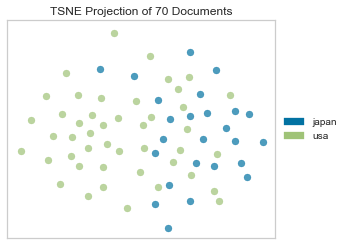

In [49]:
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


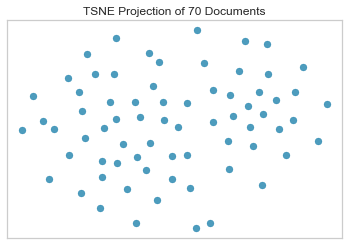

In [50]:
tsne = TSNEVisualizer()
tsne.fit(X)
tsne.show()

<1x3893 sparse matrix of type '<class 'numpy.float64'>'
	with 131 stored elements in Compressed Sparse Row format>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


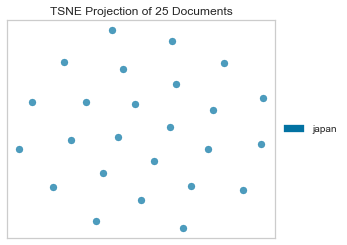

In [53]:
X = tfidf.fit_transform(doc_clean_japan)
tsne = TSNEVisualizer()
tsne.fit(X, doc_clean_japan_labels)
tsne.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


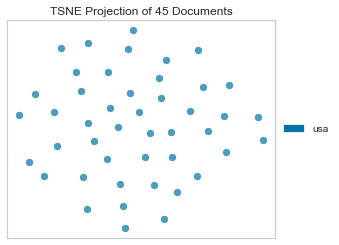

In [54]:
X = tfidf.fit_transform(doc_clean_usa)
tsne = TSNEVisualizer()
tsne.fit(X, doc_clean_usa_labels)
tsne.show()